# PDF Power Hacks: Everything You Didn’t Know You Could Do with Python and Your PDF Files  
### 🛡️ DIY in AI: Protect your data. Don’t upload it anywhere.

# 🐍 Python | Create Uncropped PNG→PDF & OCR Extract 🖼️➡️📄🔍

## ❓Ever found your generated PNGs cropped and OCR failing? 😤  
Small misalignments or negative offsets can cut off letters, wrecking your text extraction.

## 👉 Solution  
📐 Use `textbbox` + padding to render uncropped PNG, embed same-size in PDF, then OCR with `pdf2image` + `pytesseract`.

## 🔧 How does it work?  
💡 Measure text bounds with `textbbox` (captures negative offsets).  
📏 Add symmetrical padding to prevent cropping.  
📄 Draw shifted text at `(-x0, -y0)` origin.  
🔄 Embed PNG into PDF without scaling.  
🔍 Convert PDF→images and extract text via OCR.

## 🔎 Why does it matter?  
🔒 Fully local, no cloud—total data control.  
⚡ Perfect letter rendering boosts OCR accuracy.  
🛠️ Automates end‑to‑end PNG→PDF→text in one notebook.

## ✨ Real-world example:  
🏢 A compliance team digitizes signatures. Ensuring no glyph is cut off yields 100 % OCR capture and audit readiness.

## ⚙️ Business impact:  
💼 Guarantees data integrity  
⏱️ Eliminates manual crop checks  
📉 Reduces post‑OCR cleanup

## 📊 Code summary  
📏 Captures exact text bbox & padding  
🖼️ Renders uncropped PNG  
📑 Embeds same-size PDF  
🔄 Converts pages→images  
📝 Runs OCR & saves text

🔗 [GitHub](https://github.com/jcombari/AI-For-Unstructured-Data/tree/main/PDF%20Power%20Hacks)

## 💭 Thought:  
What padding strategy would you adopt for multi‑line text to ensure no loss?

🔑 #Python #DataScience #OCR #Automation #PDFprocessing #AI #DataPrivacy #TechCareers #CareerGrowth #TechForGood

🔁 If you found this useful, feel free to share it with your network.  
⚠️ Please do not copy or repost it as your own. Respect original work.

---

# PDF Power Hacks: Todo lo que no sabías que podías hacer con Python y tus archivos PDF  
### 🛡️ DIY en IA: Cuida tus datos. No los subas a ningún sitio.

# 🐍 Python | PNG sin recorte → PDF & extracción OCR 🖼️➡️📄🔍

## ❓¿Te frustran PNG recortados y OCR impreciso? 😤  
Desajustes de origen y offsets negativos cortan letras y arruinan tu extracción de texto.

## 👉 Solución  
📐 Usar `textbbox` + padding para PNG sin recorte, incrustar PDF a mismo tamaño y OCR con `pdf2image` + `pytesseract`.

## 🔧 ¿Cómo funciona?  
💡 Medir caja de texto con `textbbox` (incluye offsets negativos).  
📏 Añadir padding simétrico para evitar recortes.  
📄 Dibujar texto desplazado en `(-x0, -y0)`.  
🔄 Incrustar PNG en PDF sin escalar.  
🔍 Convertir PDF→imágenes y extraer texto con OCR.

## 🔎 ¿Por qué importa?  
🔒 Procesamiento 100 % local: máximo control.  
⚡ Letras intactas mejoran precisión OCR.  
🛠️ Automatiza PNG→PDF→texto en un solo notebook.

## ✨ Caso práctico:  
🏢 Un equipo de cumplimiento digitaliza firmas. Letras completas garantizan 100 % de captura OCR y trazabilidad.

## ⚙️ Impacto en el negocio:  
💼 Asegura integridad de datos  
⏱️ Elimina revisiones manuales  
📉 Reduce correcciones post‑OCR

## 📊 Resumen de código  
📏 Captura bbox exacto + padding  
🖼️ Genera PNG sin recorte  
📑 Crea PDF idéntico  
🔄 Convierte páginas→imágenes  
📝 Ejecuta OCR y guarda texto

🔗 [GitHub](https://github.com/jcombari/AI-For-Unstructured-Data/tree/main/PDF%20Power%20Hacks)

## 💭 Reflexión:  
¿Qué estrategia de padding usarías para textos de varias líneas y no perder nada?

🔑 #Python #CienciaDeDatos #OCR #Automatización #PDFprocessing #IA #Privacidad #CarreraTecnológica #CrecimientoProfesional #TechForGood

🔁 Si te ha parecido útil, siéntete libre de compartir esta publicación con tu red.  
⚠️ Por favor, no la copies ni la publiques como propia. Respeta el trabajo original.

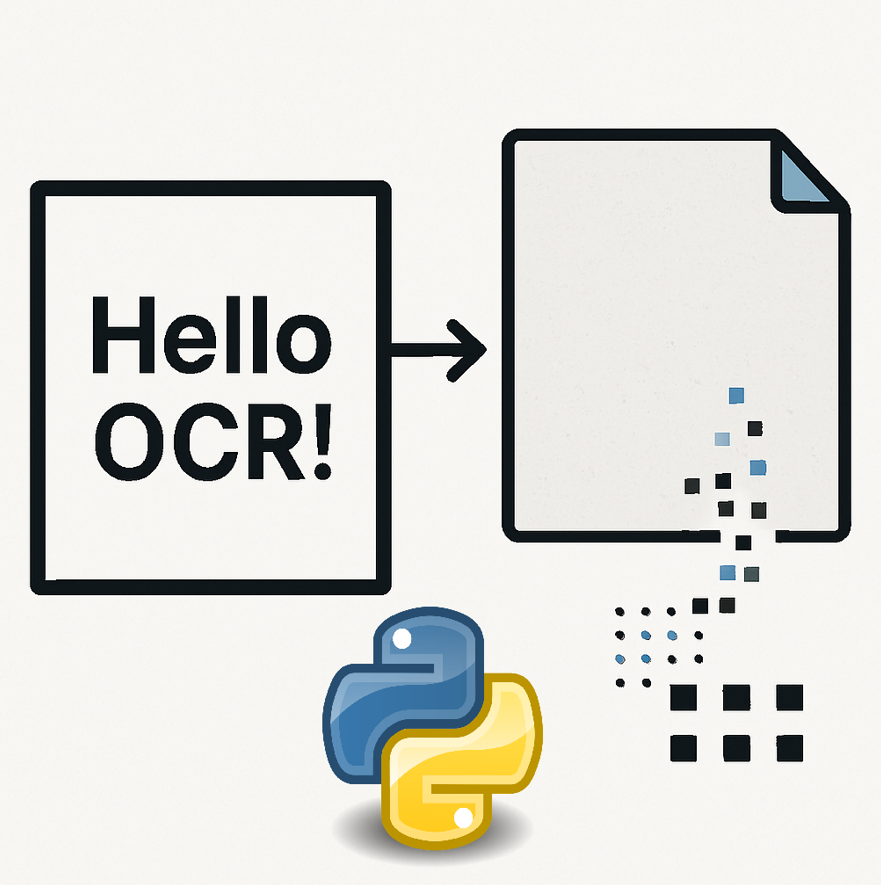

In [1]:
import fitz  # PyMuPDF
import pytesseract
from PIL import Image
import io

pdf_path = "20250701_big_text.pdf"
doc = fitz.open(pdf_path)

ocr_text = ""

for page_num in range(len(doc)):
    page = doc[page_num]
    image_list = page.get_images(full=True)
    
    print(f"Page {page_num+1} has {len(image_list)} images")
    
    for img_index, img_info in enumerate(image_list):
        xref = img_info[0]
        base_image = doc.extract_image(xref)
        image_bytes = base_image["image"]
        img_ext = base_image["ext"]
        
        image = Image.open(io.BytesIO(image_bytes))
        
        # OCR en la imagen extraída
        text = pytesseract.image_to_string(image)
        ocr_text += f"Page {page_num+1} - Image {img_index+1}:\n{text}\n"

# Guardar el texto extraído
with open("20250701_ocr_extracted_text.txt", "w", encoding="utf-8") as f:
    f.write(ocr_text)

print("OCR terminado, texto guardado en 20250701_ocr_extracted_text.txt")


Page 1 has 1 images
OCR terminado, texto guardado en 20250701_ocr_extracted_text.txt
